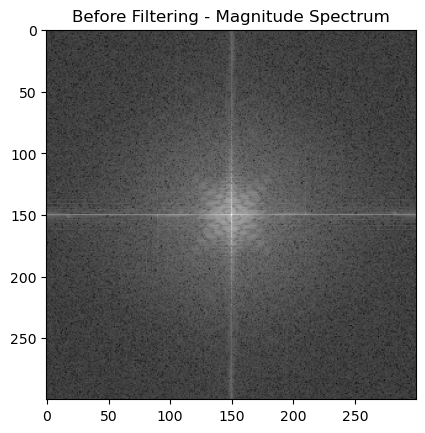

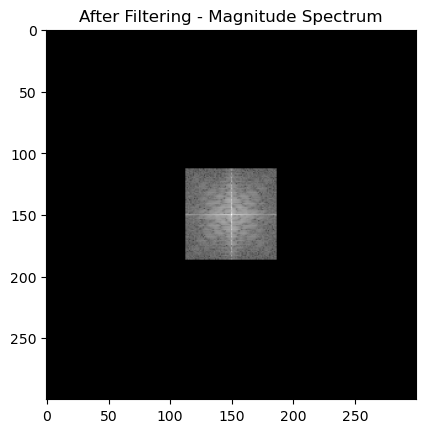

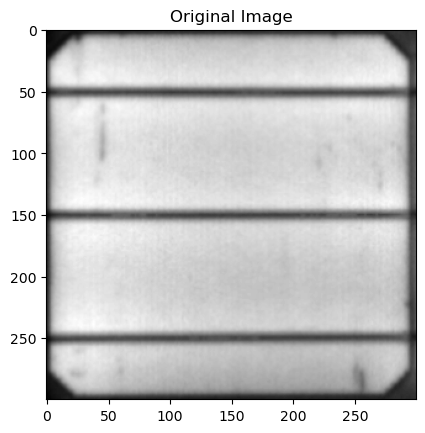

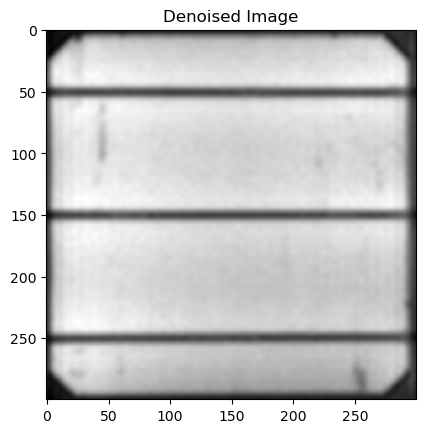

In [3]:
# import os
# import cv2
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.utils import to_categorical
# import matplotlib.pyplot as plt

# def denoise_image(src_path, dest_path):
#     # Load the image
#     image = cv2.imread(src_path, cv2.IMREAD_GRAYSCALE)
    
#     # Verify image load
#     if image is None:
#         print("Error: Image not found.")
#         return
    
#     # Fourier transform
#     frequency_transform = np.fft.fft2(image)
#     frequency_shifted = np.fft.fftshift(frequency_transform)
    
#     # Spectrum magnitude
#     spectrum = np.log(np.abs(frequency_shifted) + 1) * 20
#     normalized_spectrum = cv2.normalize(spectrum, None, 0, 255, cv2.NORM_MINMAX)
    
#     # Display the magnitude spectrum
#     plt.figure()
#     plt.title("Before Filtering - Magnitude Spectrum")
#     plt.imshow(normalized_spectrum, cmap='gray')
#     plt.show()

#     # Image dimensions
#     height, width = image.shape
#     center_y, center_x = height // 2, width // 2
    
#     # Masking
#     mask = np.ones((height, width), bool)  # Use built-in bool type
#     exclusion_zone = min(height, width) // 8
#     mask[center_y - exclusion_zone:center_y + exclusion_zone, center_x - exclusion_zone:center_x + exclusion_zone] = False
#     frequency_shifted[mask] = 0
    
#     # Spectrum after filtering
#     spectrum_filtered = np.log(np.abs(frequency_shifted) + 1) * 20
#     normalized_spectrum_filtered = cv2.normalize(spectrum_filtered, None, 0, 255, cv2.NORM_MINMAX)
#     plt.figure()
#     plt.title("After Filtering - Magnitude Spectrum")
#     plt.imshow(normalized_spectrum_filtered, cmap='gray')
#     plt.show()

#     # Inverse Fourier transform
#     inverse_frequency_shift = np.fft.ifftshift(frequency_shifted)
#     restored_image = np.abs(np.fft.ifft2(inverse_frequency_shift))
    
#     # Display original image
#     plt.figure()
#     plt.title("Original Image")
#     plt.imshow(image, cmap='gray')
#     plt.show()
    
#     # Display denoised image
#     plt.figure()
#     plt.title("Denoised Image")
#     plt.imshow(restored_image, cmap='gray')
#     plt.show()

#     # Save the denoised image
#     cv2.imwrite(dest_path, np.uint8(restored_image))

# # Execute the function with input and output paths
# denoise_image(r'C:\Users\DOCTOR\Desktop\COMP9517\Project1\IMAGE\cell0058.png', 'path_to_output_image.jpg')



In [4]:

# import cv2
# import os
# import numpy as np
# import pandas as pd

# def process_image(input_image_path, output_dir_with_line, output_dir_without_line):
#     # Function to load an image
#     def load_image(path):
#         img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
#         if img is None:
#             print("Can't load image ", path)
#             return None
#         return img

#     # Function to detect black lines using Sobel operator
#     def sobel_remove(img):
#         row_slice = img[40:55, :]
#         sobel_x = cv2.Sobel(row_slice, cv2.CV_64F, 1, 0, ksize=3)
#         sobel_y = cv2.Sobel(row_slice, cv2.CV_64F, 0, 1, ksize=3)
#         gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
#         _, otsu_thresh = cv2.threshold((gradient_magnitude * 255.0 / gradient_magnitude.max()).astype(np.uint8), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
#         return np.any(gradient_magnitude > otsu_thresh)

#     # Function to remove sections of the image
#     def remove_section(img, with_line):
#         if with_line:
#             parts = [img[:45, :], img[60:140, :], img[155:240, :], img[255:, :]]
#         else:
#             parts = [img[:70, :], img[85:210, :], img[225:, :]]
#         return np.vstack(parts)

#     # Main processing flow
#     image = load_image(input_image_path)
#     if image is not None:
#         has_line = sobel_remove(image)
#         new_image = remove_section(image, has_line)
#         output_path = os.path.join(output_dir_with_line if has_line else output_dir_without_line, os.path.basename(input_image_path))
#         cv2.imwrite(output_path, new_image)

# # Set the image directory and label file path
# image_directory = "C:\\Users\\DOCTOR\\Desktop\\ALL_images\\Oimages"
# label_file = "labels.txt"

# # Create output directories
# output_dir_with_line = 'Processed'
# output_dir_without_line = 'Processed_WO'
# os.makedirs(output_dir_with_line, exist_ok=True)
# os.makedirs(output_dir_without_line, exist_ok=True)

# # Read label file and process images
# labels_df = pd.read_csv(label_file, delimiter='\t', header=None, names=['filepath', 'label', 'type'])
# for index, row in labels_df.iterrows():
#     # Ensure correct file path
#     img_path = os.path.join(image_directory, row['filepath'].replace('/', os.sep))
#     process_image(img_path, output_dir_with_line, output_dir_without_line)

# print('Processing complete!')

#Another version of document reading and writing
# def get_training_data():
#     csv_filepath = "place_holder" # csv file path
#     training_data = []
#     training_data_limit = 2000
#     with open(csv_filepath, mode="r") as csv_file:
#         reader = csv.reader(csv_file)
#         next(reader) # skip the first row
#         # process each row
#         for row in reader:
#             if training_data_limit > 0:
#                 image = cv2.imread(row[0]) # load image
#                 resized_image = cv2.resize(image,(200,200)) # resize image
#                 damage_rate = float(row[1]) # get the damage rate
#                 training_data.append((resized_image, damage_rate))
#                 training_data_limit -= 1
#             else:
#                 pass

#     return training_data


Processing complete!


In [1]:
import cv2
import os
import numpy as np
import pandas as pd

# Function to detect and remove black lines using Sobel operator and denoise
def sobel_remove_and_denoise(img_path, output_dir):
    # Load an image
    def load_image(path):
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print("Can't load image ", path)
            return None
        return img

    # Detect black lines
    def detect_black_line(img):
        row_slice = img[40:55, :]
        sobel_x = cv2.Sobel(row_slice, cv2.CV_64F, 1, 0, ksize=3)
        sobel_y = cv2.Sobel(row_slice, cv2.CV_64F, 0, 1, ksize=3)
        gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
        _, otsu_thresh = cv2.threshold((gradient_magnitude * 255.0 / gradient_magnitude.max()).astype(np.uint8), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        return np.any(gradient_magnitude > otsu_thresh)

    # Remove sections of the image
    def remove_section(img, with_line):
        if with_line:
            parts = [img[:45, :], img[60:140, :], img[155:240, :], img[255:, :]]
        else:
            parts = [img[:70, :], img[85:210, :], img[225:, :]]
        return np.vstack(parts)

    # Denoise image using Fourier transform
    def denoise_image(img):
        # Fourier transform
        frequency_transform = np.fft.fft2(img)
        frequency_shifted = np.fft.fftshift(frequency_transform)

        # Masking
        height, width = img.shape
        center_y, center_x = height // 2, width // 2
        mask = np.ones((height, width), bool)
        exclusion_zone = min(height, width) // 8
        mask[center_y - exclusion_zone:center_y + exclusion_zone, center_x - exclusion_zone:center_x + exclusion_zone] = False
        frequency_shifted[mask] = 0

        # Inverse Fourier transform
        inverse_frequency_shift = np.fft.ifftshift(frequency_shifted)
        restored_image = np.abs(np.fft.ifft2(inverse_frequency_shift))

        return np.uint8(restored_image)

    # Main processing flow
    image = load_image(img_path)
    if image is not None:
        has_line = detect_black_line(image)
        removed_line_image = remove_section(image, has_line)
        denoised_image = denoise_image(removed_line_image)
        output_path = os.path.join(output_dir, os.path.basename(img_path))
        cv2.imwrite(output_path, denoised_image)

# Set the image directory and label file path
image_directory = "C:\\Users\\DOCTOR\\Desktop\\ALL_images\\Oimages"
label_file = "labels.txt"

# Create output directories
output_dir_mono = 'mono_Processed'
output_dir_poly = 'poly_Processed'
os.makedirs(output_dir_mono, exist_ok=True)
os.makedirs(output_dir_poly, exist_ok=True)

# Read label file and process images
labels_df = pd.read_csv(label_file, delimiter='\t', header=None, names=['filepath', 'label', 'type'])
for index, row in labels_df.iterrows():
    img_path = os.path.join(image_directory, row['filepath'].replace('/', os.sep))
    if row['type'] == 'mono':
        sobel_remove_and_denoise(img_path, output_dir_mono)
    elif row['type'] == 'poly':
        sobel_remove_and_denoise(img_path, output_dir_poly)

print('Processing complete!')
#adjust little images can't adjust

Processing complete!


In [12]:
#all class include mono and poly
import os
import cv2
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Set the directory where the data is stored
data_directory = "C:\\Users\\DOCTOR\\Desktop\\ALL_images\\"
#How about labels



# Define the mapping from numeric labels to categories
categories = {
    0.0: "normal",
    0.333333333: "0.3Break",
    0.666666667: "0.6Break",
    1.0: "TotalBreak"
}

# Load the label information from a text file
label_info = pd.read_csv(
    "C:\\Users\\DOCTOR\\Desktop\\ALL_images\\labels.txt",
    delimiter='\t',
    header=None,
    names=['image_path', 'label_value', 'image_type']
)

# Convert numeric labels to string labels
label_info['label'] = label_info['label_value'].map(categories)

# Initialize list for all images and labels
image_data = []

# Process each image and label
for index, record in label_info.iterrows():
    full_image_path = os.path.join(data_directory, record['image_path'])
    image_label = record['label']

    try:
        image = cv2.imread(full_image_path, cv2.IMREAD_GRAYSCALE)
        if image is not None:
            resized_image = cv2.resize(image, (200, 200))
            image_data.append((resized_image, image_label))
        else:
            print(f"Cannot load image at {full_image_path}.")
    except Exception as error:
        print(f"Error processing image at {full_image_path}: {error}")

# Split the data into training and testing sets (80% train, 20% test)
training_set, testing_set = train_test_split(image_data, test_size=0.2, random_state=42)

# Create mappings for categories to indices
category_indices = {category: idx for idx, category in enumerate(categories.values())}

# Prepare the training and testing datasets
X_train, Y_train_indices = zip(*[(img, category_indices[lab]) for img, lab in training_set])
X_test, Y_test_indices = zip(*[(img, category_indices[lab]) for img, lab in testing_set])

# Convert to numpy arrays and normalize
X_train = np.array(X_train).reshape(-1, 200, 200, 1) / 255.0
X_test = np.array(X_test).reshape(-1, 200, 200, 1) / 255.0

# Convert labels to one-hot encoding
Y_train = to_categorical(Y_train_indices, num_classes=len(categories))
Y_test = to_categorical(Y_test_indices, num_classes=len(categories))

# Print some training labels to ensure the one-hot encoding is correct
print("Sample one-hot encoded training labels:")
for one_hot_label in Y_train[10:20]:
    print(one_hot_label)


Sample one-hot encoded training labels:
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]


In [1]:
#class only mono/poly
import os
import cv2
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Set the directory where the data is stored
data_directory = "C:\\Users\\DOCTOR\\Desktop\\ALL_images\\Artifical\\mono_Processed\\"
#Read the address and merge it into a complete address from the txt file, and import the required data into the matrix. 
#If you want to change mono to poly, you only need to change the command address on the path
#data_directory = "C:\\Users\\DOCTOR\\Desktop\\ALL_images\\Artifical\\poly_Processed\\"

# Define the mapping from numeric labels to categories
categories = {
    0.0: "normal",
    0.333333333: "0.3Break",
    0.666666667: "0.6Break",
    1.0: "TotalBreak"
}

# Load the label information from a text file
label_info = pd.read_csv(
    "C:\\Users\\DOCTOR\\Desktop\\ALL_images\\labels.txt",
    delimiter='\t',
    header=None,
    names=['image_path', 'label_value', 'image_type']
)

# Convert numeric labels to string labels
label_info['label'] = label_info['label_value'].map(categories)

# Initialize list for all images and labels
image_data = []

# Process each image and label
for index, record in label_info.iterrows():
    if record['image_type'] != 'mono':
        continue  # Skip images that are not of type 'mono'/also could change to "poly"

    full_image_path = os.path.join(data_directory, record['image_path'])
    image_label = record['label']

    try:
        image = cv2.imread(full_image_path, cv2.IMREAD_GRAYSCALE)
        if image is not None:
            resized_image = cv2.resize(image, (200, 200))
            image_data.append((resized_image, image_label))
        else:
            print(f"Cannot load image at {full_image_path}.")
    except Exception as error:
        print(f"Error processing image at {full_image_path}: {error}")

# Split the data into training and testing sets (80% train, 20% test)
training_set, testing_set = train_test_split(image_data, test_size=0.2, random_state=42)

# Create mappings for categories to indices
category_indices = {category: idx for idx, category in enumerate(categories.values())}

# Prepare the training and testing datasets
X_train, Y_train_indices = zip(*[(img, category_indices[lab]) for img, lab in training_set])
X_test, Y_test_indices = zip(*[(img, category_indices[lab]) for img, lab in testing_set])

# Convert to numpy arrays and normalize
X_train = np.array(X_train).reshape(-1, 200, 200, 1) / 255.0
X_test = np.array(X_test).reshape(-1, 200, 200, 1) / 255.0

# Convert labels to one-hot encoding
Y_train = to_categorical(Y_train_indices, num_classes=len(categories))
Y_test = to_categorical(Y_test_indices, num_classes=len(categories))

# Print some training labels to ensure the one-hot encoding is correct
print("Sample one-hot encoded training labels:")
for one_hot_label in Y_train[10:20]:
    print(one_hot_label)



Sample one-hot encoded training labels:
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]


In [2]:

from sklearn.metrics import confusion_matrix
import itertools
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Activation, Dropout



model = Sequential()

model.add(Conv2D(filters=8, kernel_size=(3,3), padding='Same', activation='relu', input_shape=(200,200,1)))
model.add(BatchNormalization())  # Batch Normalization layer
model.add(Conv2D(filters=16, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(BatchNormalization())  # Batch Normalization layer
model.add(MaxPool2D((2,2),strides=(2,2)))

model.add(Dropout(0.25)) 

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(BatchNormalization())  # Batch Normalization layer


model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='sigmoid'))
optimizer = Adam(learning_rate=0.00002, beta_1=0.85, beta_2=0.98)

model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

# Not always useful but another method
#model = Sequential([
#     # Convolutional layers with batch normalization and ReLU activation
#     Conv2D(filters=8, kernel_size=(3,3), padding='same', input_shape=(200,200,1)),
#     BatchNormalization(),
#     Activation('relu'),
    
#     Conv2D(filters=16, kernel_size=(3,3), padding='same'),
#     BatchNormalization(),
#     Activation('relu'),
    
#     MaxPooling2D(pool_size=(2,2), strides=2),
    
#     Conv2D(filters=32, kernel_size=(3,3), padding='same'),
#     BatchNormalization(),
#     Activation('relu'),
    
#     # Dropout layer
#     Dropout(0.25),
    
#     # Flatten layer to prepare for the fully connected layers
#     Flatten(),
    
#     # Fully connected layers
#     Dense(9, activation='relu'),
#     # The following layer is commented out to match the MATLAB example where it's not active
#     # Dense(1000, activation='relu'),
    
#     # Output layer with softmax activation
#     Dense(4, activation='sigmoid')
# ])

epochs = 10
batch_size = 15

datagen = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False, 
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,  
        zca_whitening=False,
        rotation_range=0.2, # Changed the rotation range
        zoom_range = 0.2, 
        width_shift_range=0.2,  # Adjusted the width shift range
        height_shift_range=0.2,  # Adjusted the height shift range
        horizontal_flip=False, 
        vertical_flip=False)

Epoch 1/10
57/57 [==============================] - ETA: 0s - loss: 1.3462 - accuracy: 0.5581

C:\Users\DOCTOR\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


New best model saved: model-best-000-0.0837.h5
57/57 [==============================] - 20s 344ms/step - loss: 1.3462 - accuracy: 0.5581 - val_loss: 1.4835 - val_accuracy: 0.0837
Epoch 2/10
57/57 [==============================] - 20s 350ms/step - loss: 1.0668 - accuracy: 0.6019 - val_loss: 1.2461 - val_accuracy: 0.6233
Epoch 3/10
57/57 [==============================] - 20s 350ms/step - loss: 1.0329 - accuracy: 0.6199 - val_loss: 1.2341 - val_accuracy: 0.6233
Epoch 4/10
57/57 [==============================] - 19s 339ms/step - loss: 0.9920 - accuracy: 0.6268 - val_loss: 1.2121 - val_accuracy: 0.6279
Epoch 5/10
57/57 [==============================] - 18s 312ms/step - loss: 0.9952 - accuracy: 0.6232 - val_loss: 1.1119 - val_accuracy: 0.6186
Epoch 6/10
57/57 [==============================] - 18s 313ms/step - loss: 0.9889 - accuracy: 0.6244 - val_loss: 1.1973 - val_accuracy: 0.5767
Epoch 7/10
57/57 [==============================] - 18s 311ms/step - loss: 0.9957 - accuracy: 0.6197 - val

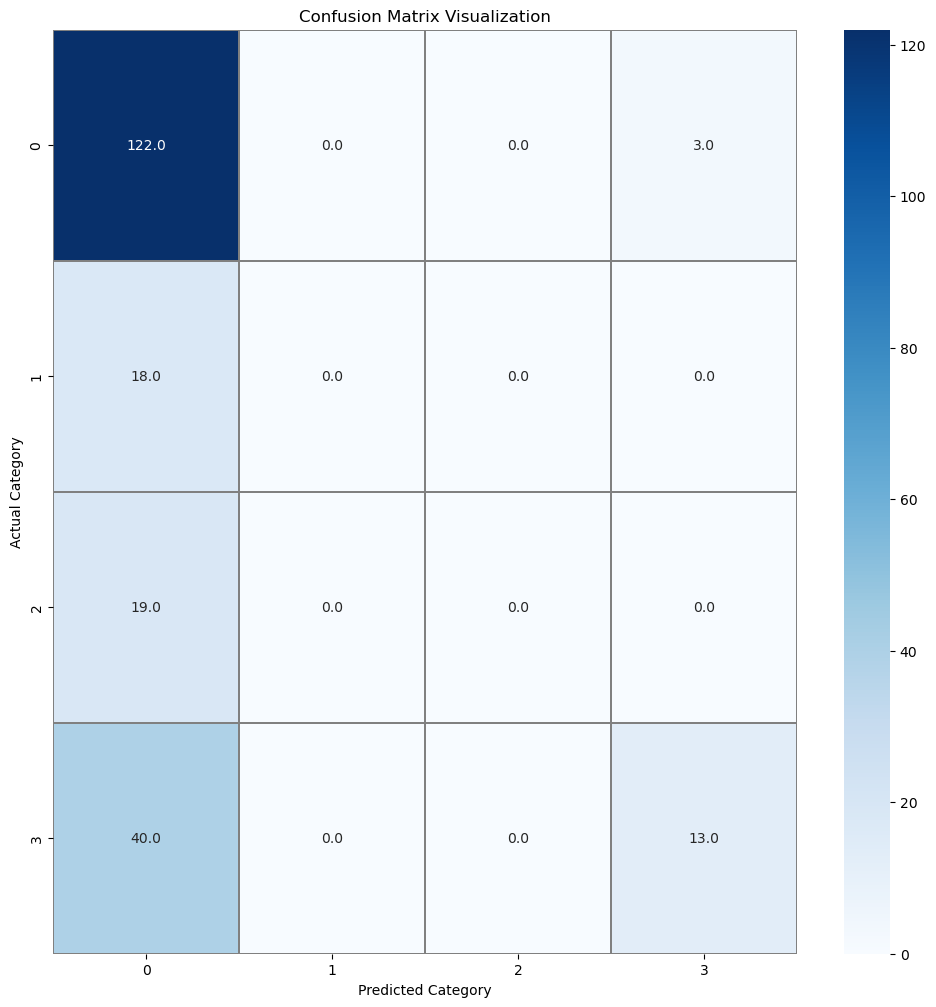

Test Loss: 1.2121258974075317
Test Accuracy: 0.6279069781303406


In [3]:
#Final version
from keras.callbacks import ModelCheckpoint, Callback
import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

class BestModelCallback(Callback):
    def __init__(self, model):
        super(BestModelCallback, self).__init__()
        self.best_val_accuracy = 0.0
        #at least have a model
        self.best_model = model
        self.best_model_path = ""

    def on_epoch_end(self, epoch, logs=None):
        current_val_accuracy = logs.get("val_accuracy")
        if current_val_accuracy > self.best_val_accuracy:
            self.best_val_accuracy = current_val_accuracy
            self.best_model_path = f'model-best-{epoch:03d}-{current_val_accuracy:.4f}.h5'
            # Save the best model
            self.best_model.save(self.best_model_path)
            print(f"New best model saved: {self.best_model_path}")

# Custom callback to track the best model
best_model_callback = BestModelCallback(model)

# Fit model
history = model.fit(datagen.flow(X_train, Y_train, batch_size=batch_size),
                    epochs=epochs, 
                    validation_data=(X_test, Y_test), 
                    steps_per_epoch=X_train.shape[0] // batch_size,
                    callbacks=[best_model_callback])

# Ensure the best model was saved
if best_model_callback.best_model_path:
    # Load the best model
    best_model = keras.models.load_model(best_model_callback.best_model_path)
    print(f"Best model loaded: {best_model_callback.best_model_path}")

    # Predict on test dataset with best model
    test_predictions = best_model.predict(X_test)
    predicted_categories = np.argmax(test_predictions, axis=1)
    true_categories = np.argmax(Y_test, axis=1)

    # Generate confusion matrix
    matrix_of_confusion = confusion_matrix(true_categories, predicted_categories)

    # Plot the confusion matrix
    plt.figure(figsize=(12, 12))
    sns.heatmap(matrix_of_confusion, annot=True, linewidths=0.01, cmap="Blues", linecolor="gray", fmt='.1f')
    plt.xlabel("Predicted Category")
    plt.ylabel("Actual Category")
    plt.title("Confusion Matrix Visualization")
    plt.show()

    # Evaluate the best model
    evaluation = best_model.evaluate(X_test, Y_test, verbose=0)
    print("Test Loss:", evaluation[0])
    print("Test Accuracy:", evaluation[1])
else:
    print("No best model was saved.")
